In [1]:
import sys 
import os
sys.path.append(os.path.abspath(".."))

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import re
import itertools 
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders, graph

%matplotlib inline 

In [9]:
sim1 = lambda ua, ub: 2*np.dot(ua, ub) / (np.dot(ua, ua) + np.dot(ub, ub)) 
sim2 = lambda ua, ub: np.dot(ua/np.dot(ua, ua), ub/np.dot(ub, ub)) 
norm = lambda v: np.sqrt((v**2).sum())
sim3 = lambda ua, ub: np.dot(ua/norm(ua), ub/norm(ub)) 

vecL = np.array([0, 0, 1, 1])
vecM = np.array([1, 0, 1, 0])
vecR = np.array([1, 1, 0, 0])

vecs = [("vecL", vecL), ("vecM", vecM), ("vecR", vecR)]
fncs = [("sim1", sim1), ("sim2", sim2), ("sim3", sim3), ("graph.cosSim", graph.cosSim)]

dct = dict()
for i in range(1, 10):
    for orl, left, in vecs:
        for name, fcn in fncs:
            for orr, right in vecs:
                dct[(i, name, orl, orr)] = fcn(i*left, i*right)


fcneval =  pd.Series(dct, name='res').reset_index().rename(columns={'level_0': 'factor', 'level_1': 'function',
                                                                    'level_2': 'left', 'level_3': 'right'})
fcneval['function'] = fcneval.function.str.replace('graph.cosSim', 'cos')
display(fcneval.head())

lr = fcneval[['left', 'right']] 
fcneval_mid = fcneval[(lr == 'vecM').sum(axis=1) == 1]
fcneval_idd = fcneval[lr.apply(pd.value_counts, axis=1).fillna(0).max(axis=1) == 2]
tmp = lr.apply(pd.value_counts, axis=1).fillna(0) 
fcneval_non = fcneval[(tmp.vecL == 1) & (tmp.vecR == 1)]


,factor,function,left,right,res
0,1,cos,vecL,vecL,0.50
1,1,cos,vecL,vecM,0.25
2,1,cos,vecL,vecR,0.00
3,1,cos,vecM,vecL,0.25
4,1,cos,vecM,vecM,0.50


(<matplotlib.figure.Figure at 0x7f02c687c940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f02c73765f8>)

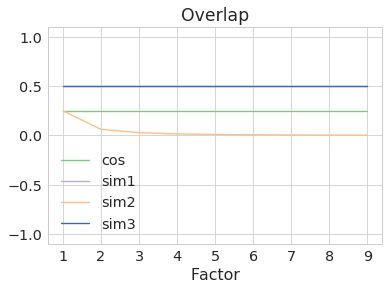

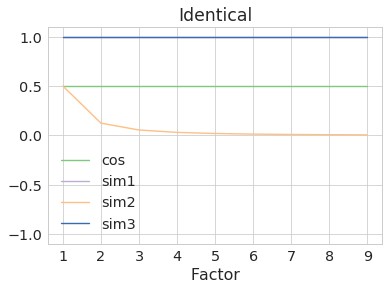

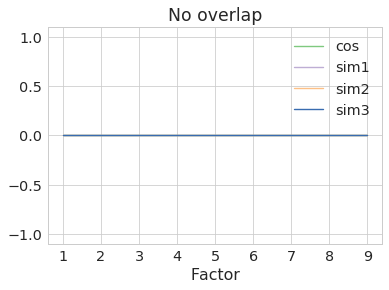

In [10]:
def plotit(df, label):
    data = list(df.groupby("function"))
    fig, ax = plt.subplots()
    for el in data:
        ax.plot(el[1].groupby('factor').mean(), label=el[0])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlabel("Factor")
    ax.set_xticks(np.arange(1, 10))
    plt.legend()
    ax.set_title(label)
    return fig, ax

plotit(fcneval_mid, "Overlap")
plotit(fcneval_idd, "Identical")
plotit(fcneval_non, "No overlap")